## Extrapolation for 3000/fb of integrate luminosity starting from [HIG-16-012](http://cms-results.web.cern.ch/cms-results/public-results/preliminary-results/HIG-16-012/index.html) results

#### Changes wrt to HIG-16-012 datacards are:
* shape uncertainties coming from low MC statistics are deemed negligible 

* statistical (CR) uncertainties for data-driven QCD is assumed to be negligible

* remove ttbar pT reweighting shape uncertainty 

* all other systematics are left untouched

#### Perform 95% CL upper limits on the cross section times the BR w.r.t. the SM expected cross section for the following scenarios:
1. Without changing anything in the nuisances parameters but just what is defined in the previous section

2. Reducing the nuisance parameters associated to the background estimation by a factor N > 1
    * DY from 1.24 to 1.01
    * ttbar from 1.05 to 1.02
    * diboson from 1.10 to 1.01
    * single top from 1.053 to 1.02

3. Reducing the nuisance parameters associated to objects (electrons-muons-jets-bjets) to the asymtotic values that will be reached with 3000/fb
    * electron and muon systematics 1.01
    * tau systematics 1.02/1.03 (for etau-mutau/tautau final states)
    * btag 1.02
    * remove b-scale systematics and jet-scale (why there was a jet-scale nuisance?)
    * luminosity 1.015

4. Assuming an improved analysis following what is done in the TP analysis [FTR-15-002](https://cds.cern.ch/record/2063038/files/FTR-15-002-pas.pdf)
    * reduce by a factor 2 the expcted ttbar events 
    * reduce by a factor 4 the expcted QCD events 

5. Considering only the statistical systematic

#### Running the code 

text2workspace.py hh_ttbb_SM_13TeV_ext.txt -m 125 -o hh_ttbb_SM_13TeV_ext.root
<br>
combine -M Asymptotic -d hh_ttbb_SM_13TeV_ext.root --run blind --setPhysicsModelParameters <font color='red'>lumiscale=1111</font> -m 125 -n SM_13TeV_3ab --rMax 40 <font color='red'>--freezeNuisances all </font> 

lumiscale=1 == 2.7/fb <br>
lumiscale=37 === 100/fb <br>
lumiscale=111 === 300/fb <br>
lumiscale=370 === 1000/fb <br>
lumiscale=1111 === 3000/fb

#### Results

| Luminosity  | scenario 1 | scenario 2 | scenario 3 | scenario 4 | scenario 5 |
|:-:|:-:|:-:|:-:|:-:|:-:|
| 2.7 | 228.5000| 226.5000 | 211.6250 | 175.2500 | 171.9375 |
| 100 |  35.3750| 31.3750 | 29.8750 | 24.8125 | 21.9375 |
| 300 |  22.6875 | 18.1875 | 17.1875 | 14.5625 | 12.2812 |
| 1000 | 14.1875| 10.5312 | 9.5938 | 8.2500 | 6.5938 |
| 3000 |  8.7500 | 6.7188 | 5.9531 | 5.1719 | 3.7656 |

In [2]:
%matplotlib inline

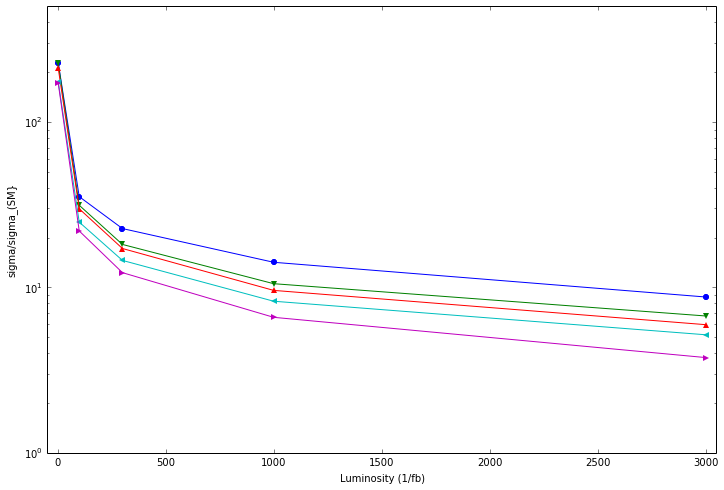

In [57]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.clf()
plt.subplot(111)


lumi = [2.7,100,300,1000,3000]
scenario1 = [228.5000,35.3750,22.6875,14.1875,8.7500]
scenario2 = [226.5000,31.3750,18.1875,10.5312,6.7188]
scenario3 = [211.6250,29.8750,17.1875,9.5938,5.9531]
scenario4 = [175.2500,24.8125,14.5625,8.2500,5.1719]
scenario5 = [171.9375,21.9375,12.2812,6.59380,3.7656]

marker = itertools.cycle(('o', 'v', '^', '<', '>', 's', '8', 'p'))
plt.gca().set_color_cycle(None)

plt.semilogy(lumi,scenario1,linestyle='-', markeredgecolor='none', marker=marker.next())
plt.semilogy(lumi,scenario2,linestyle='-', markeredgecolor='none', marker=marker.next())
plt.semilogy(lumi,scenario3,linestyle='-', markeredgecolor='none', marker=marker.next())
plt.semilogy(lumi,scenario4,linestyle='-', markeredgecolor='none', marker=marker.next())
plt.semilogy(lumi,scenario5,linestyle='-', markeredgecolor='none', marker=marker.next())

plt.ylabel(r'sigma/sigma_(SM}', labelpad=6)
plt.xlabel(r'Luminosity (1/fb)', labelpad=6)
plt.axis([-50, 3050, 1, 500])

plt.show()